In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter Plot
- Line plot과의 차이점
    1. size/color array 전달이 가능하다.
        - 3차원 or 4차원 정보를 전달할 수 있다.
        - 다만 요소가 많아지면 가시성이 떨어진다는 문제점이 있다.
        - 점들끼리의 비교가 핵심이다.
    2. 점들을 이어주는 라인에 대한 정보가 없기 때문에 속도가 빠르다.

<목차>
1. ax.plot, ax.scatter
2. size/color array
3. advanced markers, legend
4. size legend
5. 연습문제

## 1) ax.scatter
- 매개변수 x, y에 대해 동일한 길이의 데이터를 전달해야 한다.
    - x, y는 optional argument가 아니다.

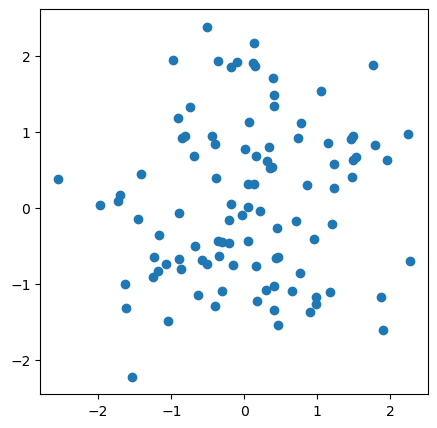

In [2]:
np.random.seed(0)

n_data = 100
x_data = np.random.normal(0, 1, (n_data, ))
y_data = np.random.normal(0, 1, (n_data, ))

fig, ax = plt.subplots(figsize=(5, 5))

# ax.plot(x_data, y_data, 'o')
ax.scatter(x_data, y_data)

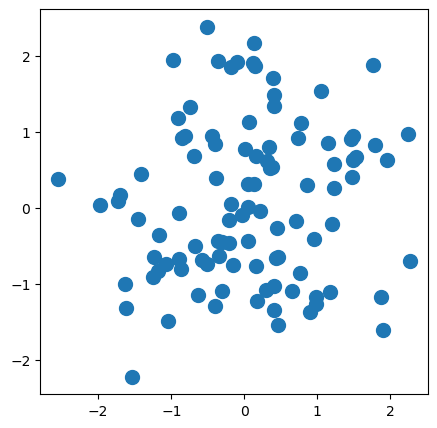

In [3]:
np.random.seed(0)

n_data = 100
x_data = np.random.normal(0, 1, (n_data, ))
y_data = np.random.normal(0, 1, (n_data, ))

fig, ax = plt.subplots(figsize=(5, 5))

# ax.plot(x_data, y_data, 'o', markersize=10)
ax.scatter(x_data, y_data, s=100)

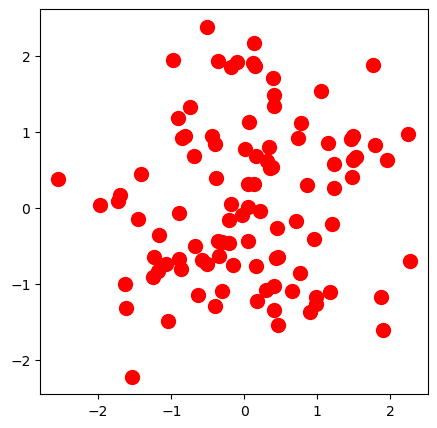

In [4]:
np.random.seed(0)

n_data = 100
x_data = np.random.normal(0, 1, (n_data, ))
y_data = np.random.normal(0, 1, (n_data, ))

fig, ax = plt.subplots(figsize=(5, 5))

# ax.plot(x_data, y_data, 'o', color='r', markersize=10)
ax.scatter(x_data, y_data, s=100, color='r')

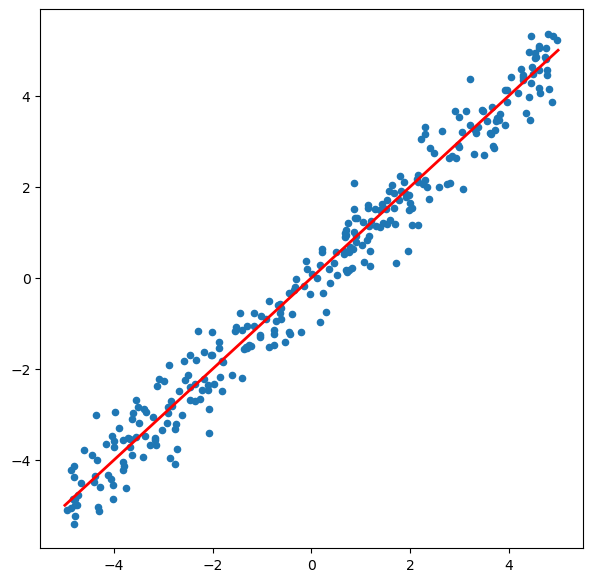

In [5]:
# line plot, scatter plot 가독성 비교
np.random.seed(0)

x_min, x_max = -5, 5
n_data = 300

x_data = np.random.uniform(x_min, x_max, n_data)
y_data = x_data + 0.5*np.random.normal(0, 1, n_data)

pred_x = np.linspace(x_min, x_max, 300)
pred_y = pred_x

fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(x_data, y_data, s=20)

ax.plot(pred_x, pred_y,
        color='r',
        linewidth=2)

## 2) size/color array
- 3차원 혹은 4차원 정보를 한 그래프 안에 담을 수 있다.
- 하지만 데이터가 많아지면 가시성이 떨어지는 문제점이 있다.

### size array

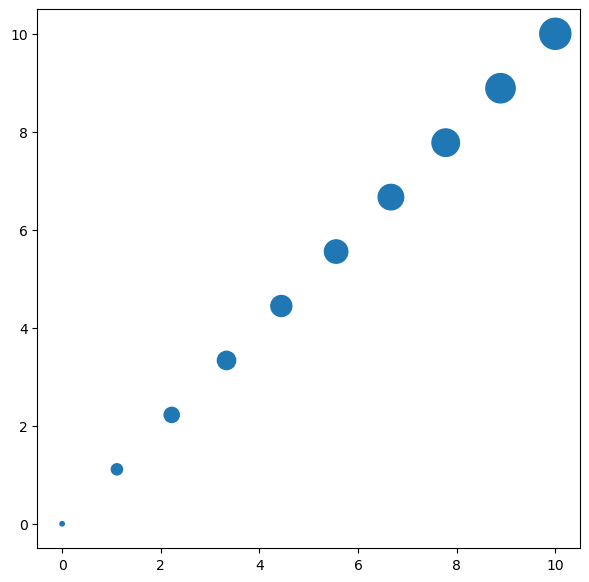

In [6]:
n_data = 10
x_data = np.linspace(0, 10, n_data)
y_data = np.linspace(0, 10, n_data)

arr_size = np.linspace(10, 500, n_data)

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x_data, y_data, s=arr_size)

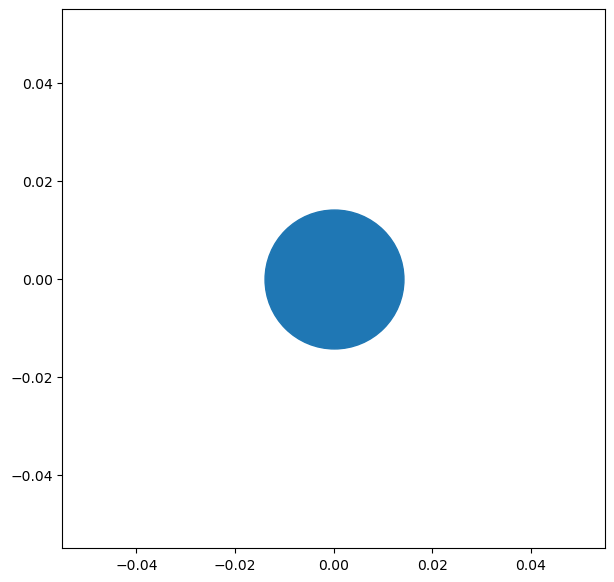

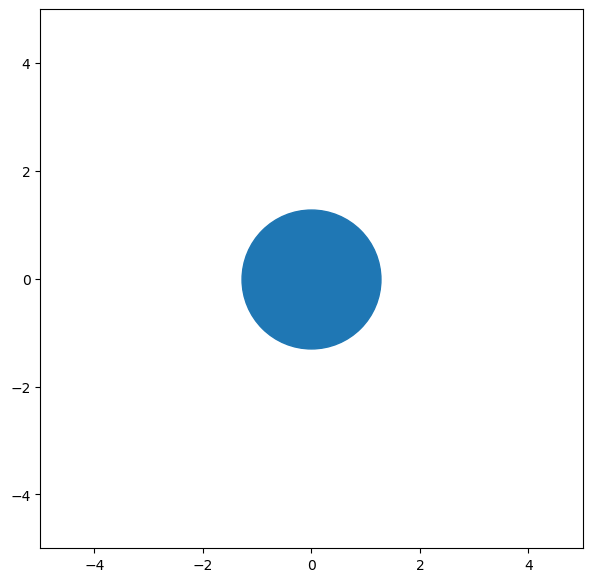

In [7]:
# s는 절대적인 크기를 의미한다.

# case1
fig, ax = plt.subplots(figsize=(7, 7))
# ax.plot(0, 0, 'o', markersize=100)
ax.scatter(0, 0, s=100**2)

# case2
fig2, ax2 = plt.subplots(figsize=(7, 7))
ax2.set_xlim([-5, 5])
ax2.set_ylim([-5, 5])
ax2.scatter(0, 0, s=100**2)

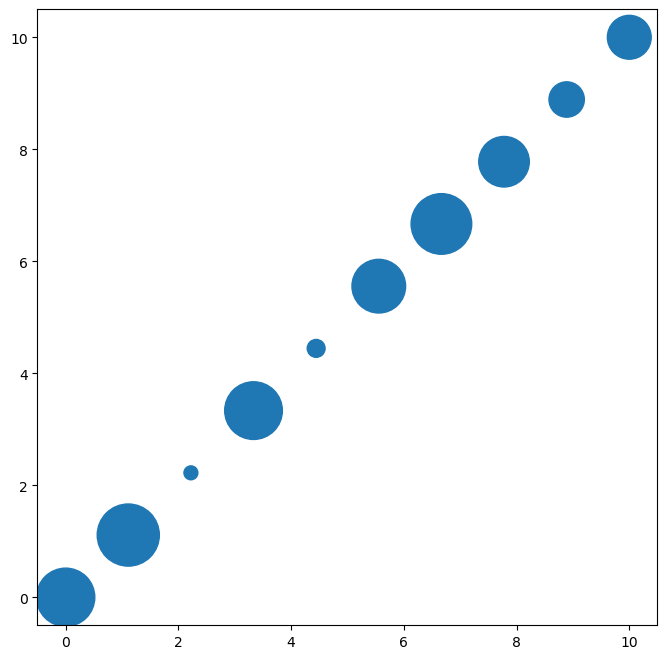

In [8]:
# 🔥 데이터 압축
def data2size(data, min_size, max_size):
    data_copy = data.copy()
    
    min_val = np.min(data_copy)
    data_copy -= min_val
    
    max_val = np.max(data_copy)
    data_copy /= max_val
    
    interval = max_size - min_size
    data_copy *= interval
    data_copy += min_size

    return data_copy

n_data = 10
x_data = np.linspace(0, 10, n_data)
y_data = np.linspace(0, 10, n_data)

z_data = np.random.normal(0, 1, n_data)
arr_size = data2size(z_data, 100, 2000)

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_data, y_data, s=arr_size)

### color array
- cmap과 list comprehension을 이용해서 미리 color array를 생성한다.

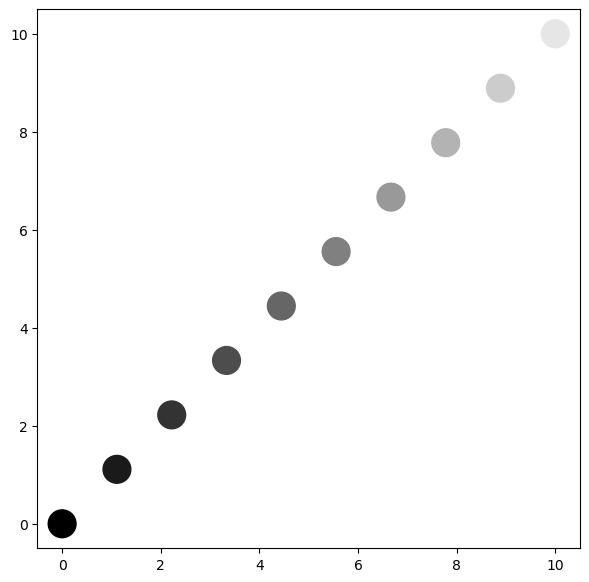

In [9]:
n_data = 10
x_data = np.linspace(0, 10, n_data)
y_data = np.linspace(0, 10, n_data)

arr_color = [(c/10, c/10, c/10) for c in range(n_data)]

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x_data, y_data, s=400, c=arr_color)

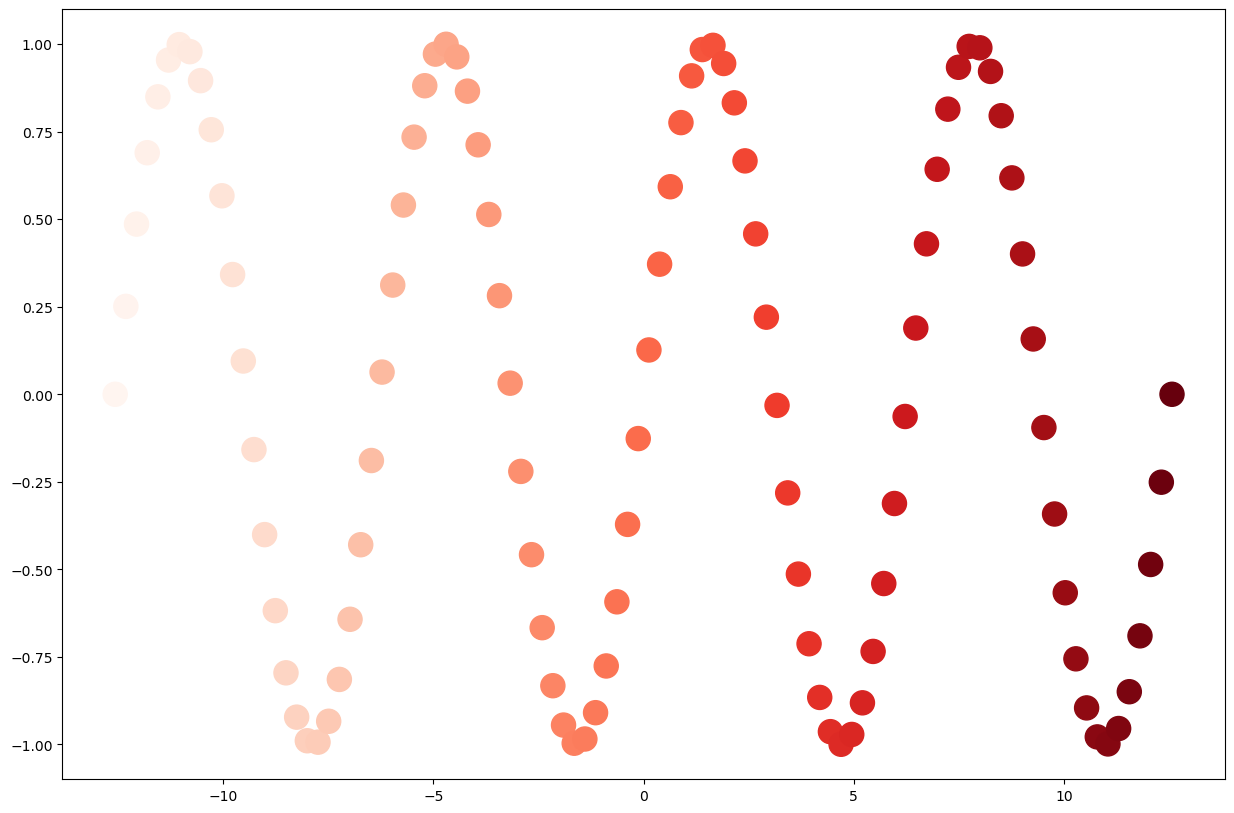

In [10]:
# cmap과 list comprehension을 이용해서 미리 color array를 생성한다.
PI = np.pi
n_point = 100
t = np.linspace(-4*PI, 4*PI, n_point)
sin = np.sin(t)

cmap = plt.get_cmap('Reds', lut=n_point)
arr_color = [cmap(idx) for idx in range(n_point)]

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(t, sin, s=300, c=arr_color)

### size array + color array
- 데이터가 겹치는 문제점이 있다.
    - 문제 해결을 위해 투명도(alpha)를 조절하면 된다.

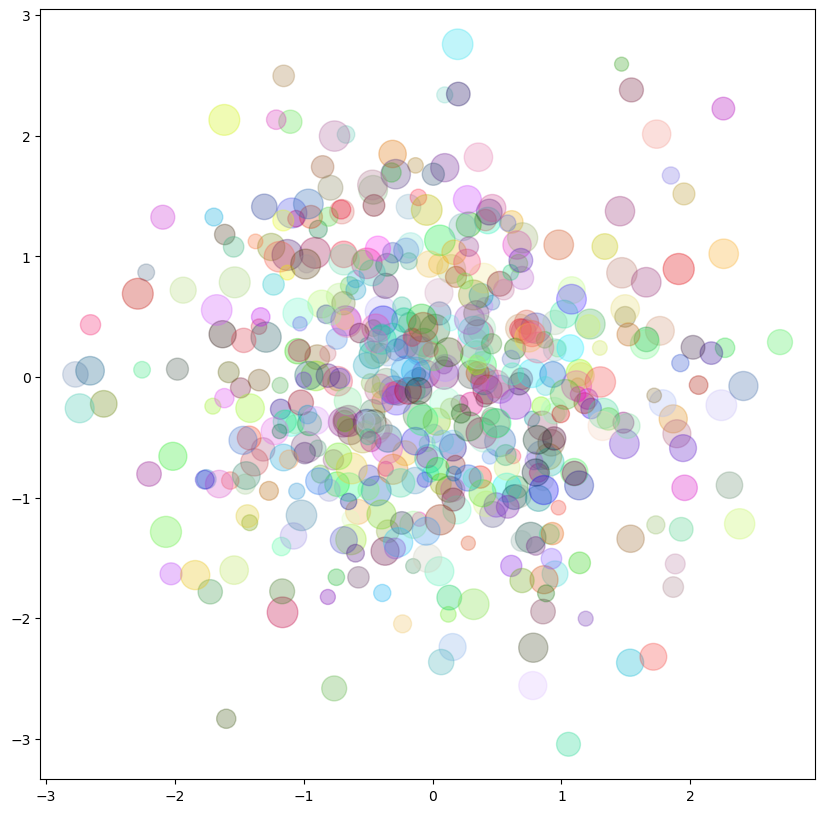

In [11]:
np.random.seed(0)

n_data = 500
x_data = np.random.normal(0, 1, size=(n_data, ))
y_data = np.random.normal(0, 1, size=(n_data, ))

arr_size = np.random.uniform(100, 500, n_data)
arr_color = [np.random.uniform(0, 1, 3) for _ in range(n_data)]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_data, y_data, s=arr_size, c=arr_color, alpha=.3)

## 3) advanced markers, legend
- ax.legend 메서드의 매개변수
    - title, title_fontsize
    - edgecolor, facecolor
    - labelspacing, columnspacing

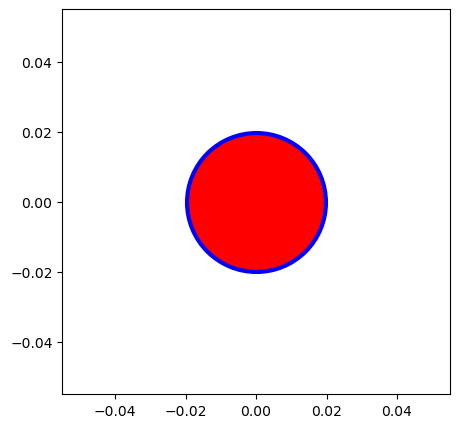

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(0, 0, s=10000,
           facecolor='r',
           edgecolor='b',
           linewidth=3)

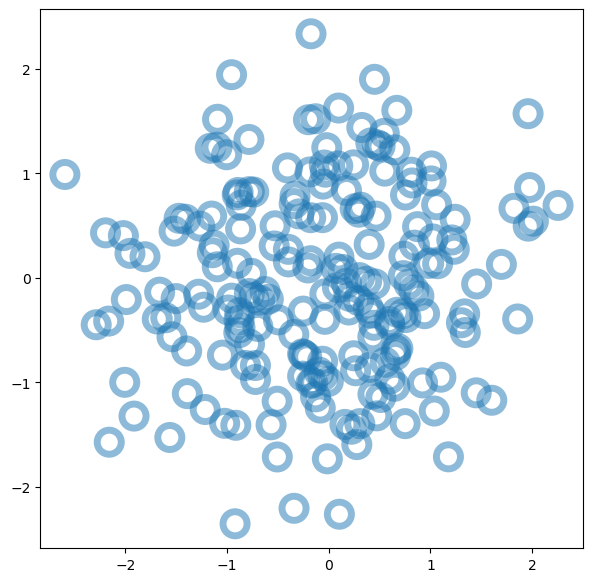

In [13]:
n_data = 200
x_data = np.random.normal(0, 1, (n_data, ))
y_data = np.random.normal(0, 1, (n_data, ))

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x_data, y_data, s=300,
          # facecolor='white' 사용 X
          facecolor='None',
          edgecolor='tab:blue',
          linewidth=5,
          # 투명도를 설정하면 밀집된 정도를 표현할 수 있다.
          alpha=.5)

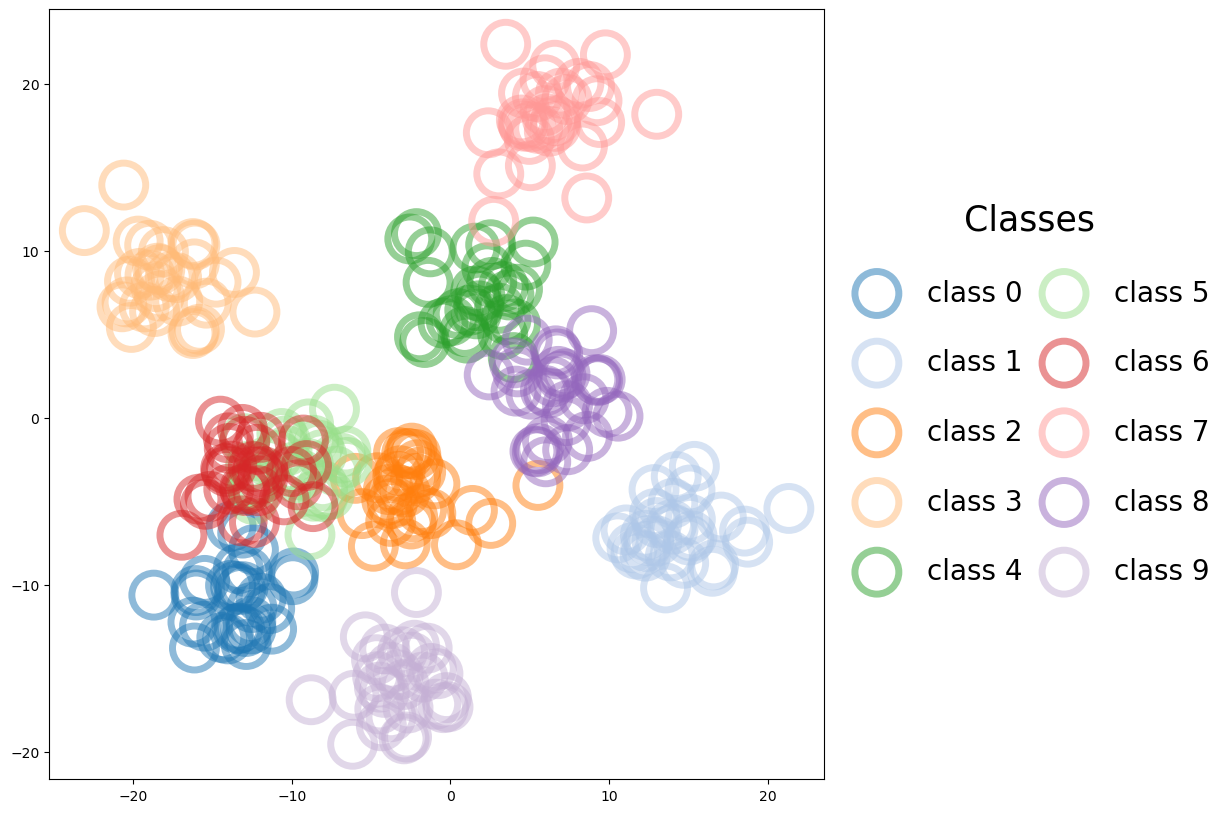

In [14]:
n_class, n_data = 10, 30
center_pt = np.random.uniform(-20, 20, (n_class, 2))
cmap = plt.get_cmap('tab20')
arr_color = [cmap(i) for i in range(n_class)]

data_dict = {'class' + str(i): None for i in range(n_class)}
for class_idx in range(n_class):
    center = center_pt[class_idx]
    x_data = center[0] + 2*np.random.normal(0, 1, (1, n_data))
    y_data = center[1] + 2*np.random.normal(0, 1, (1, n_data))
    data = np.vstack([x_data, y_data])
    
    data_dict['class' + str(class_idx)] = data
    
fig, ax = plt.subplots(figsize=(10, 10))

for class_idx in range(n_class):
    data = data_dict['class' + str(class_idx)]
    ax.scatter(data[0], data[1], s=1000,
               facecolor='None',
               edgecolor=arr_color[class_idx],
               linewidth=5,
               alpha=.5,
               label='class ' + str(class_idx))

ax.legend(loc='center left',
          bbox_to_anchor=(1, .5),
          ncol=2,
          fontsize=20,
          title='Classes',
          title_fontsize=25,
          edgecolor='None',
          facecolor='None',
          labelspacing=1.5,
          columnspacing=.5)

## 4) size legend ⭐️

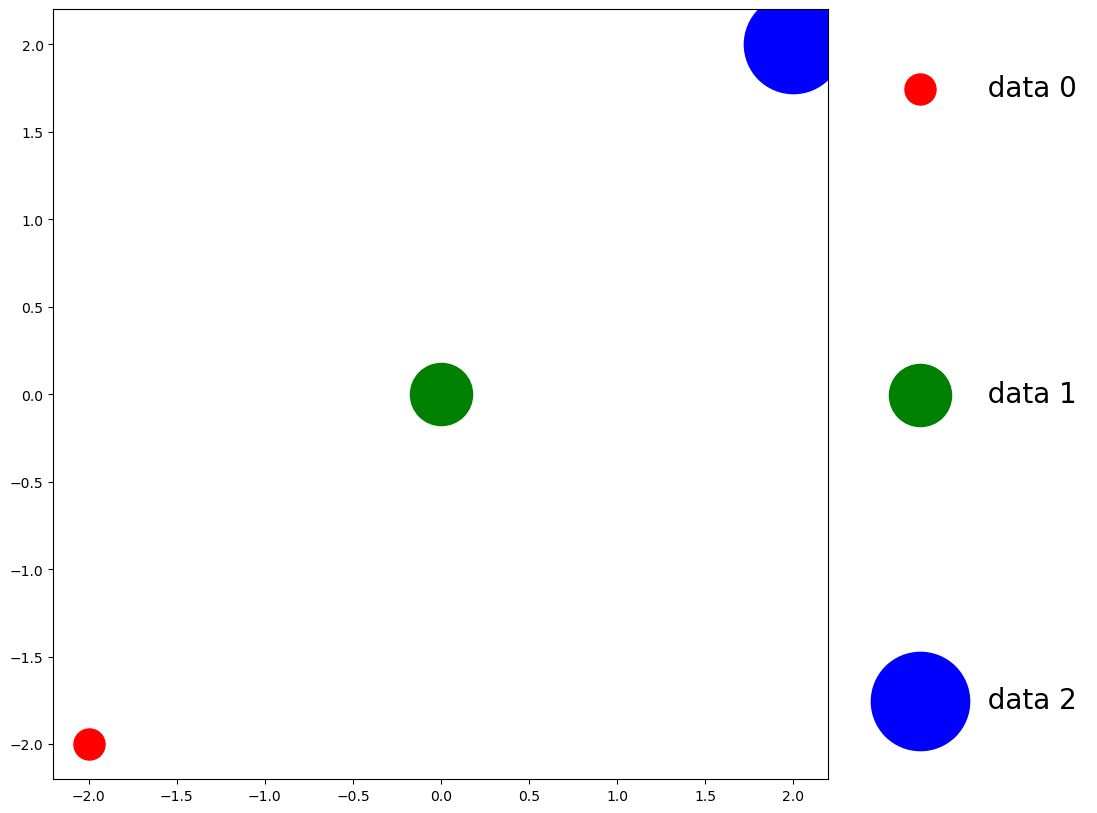

In [15]:
arr_color= ['r', 'g', 'b']
arr_size = [500, 2000, 5000]

x_loc = [-2, 0, 2]
y_loc = x_loc

fig, ax = plt.subplots(figsize=(10, 10))
for plot_idx in range(len(arr_color)):
    ax.scatter(x_loc[plot_idx], y_loc[plot_idx],
               c=arr_color[plot_idx],
               s=arr_size[plot_idx],
               label='  data ' + str(plot_idx))

ax.legend(loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          labelspacing=10,
          fontsize=20,
          edgecolor='None')

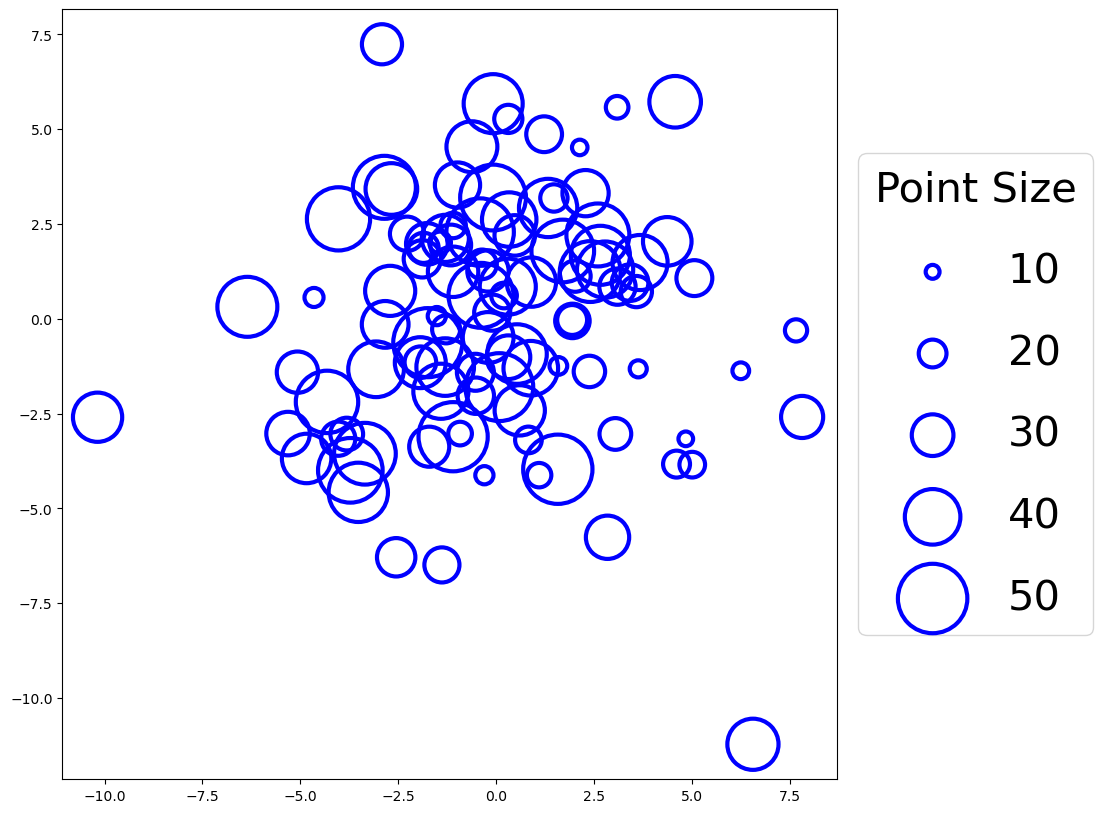

In [16]:
n_data = 100
x_data = np.random.normal(0, 3, (n_data, ))
y_data = np.random.normal(0, 3, (n_data, ))
arr_size = np.random.uniform(10, 50, (n_data, ))

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_data, y_data,
           s=arr_size ** 2,
           facecolor='None',
           edgecolor='blue',
           linewidth=3)

# size legend
legend_sizes = np.array([10, 20, 30, 40, 50])
for l_size in legend_sizes:
    ax.scatter([], [],
               facecolor='None',
               edgecolor='blue',
               linewidth=3,
               s=l_size ** 2,
               label=str(l_size))
ax.legend(loc='center left',
          bbox_to_anchor=(1, .5),
          title='Point Size',
          title_fontsize=30,
          fontsize=30,
          labelspacing=1)

### fake legend

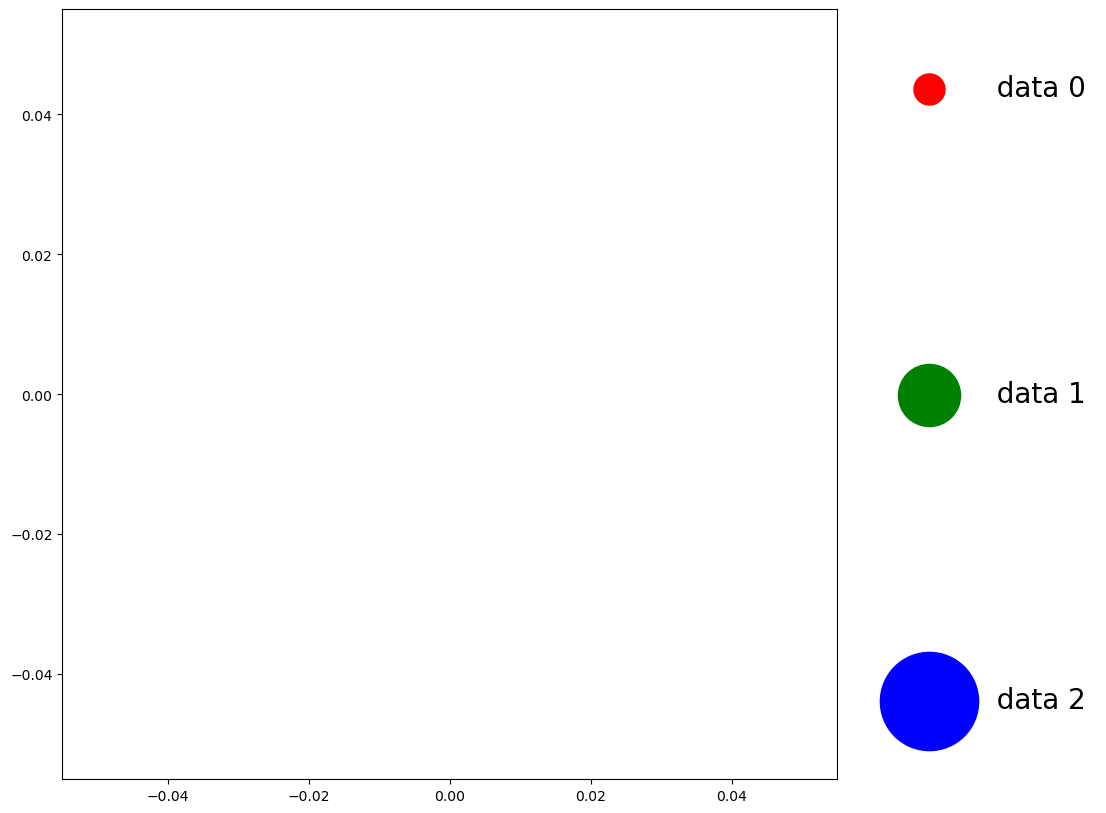

In [17]:
arr_color= ['r', 'g', 'b']
arr_size = [500, 2000, 5000]

x_loc = [-2, 0, 2]
y_loc = x_loc

fig, ax = plt.subplots(figsize=(10, 10))
for plot_idx in range(len(arr_color)):
    ax.scatter([], [],
               c=arr_color[plot_idx],
               s=arr_size[plot_idx],
               label='  data ' + str(plot_idx))

ax.legend(loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          labelspacing=10,
          fontsize=20,
          edgecolor='None')

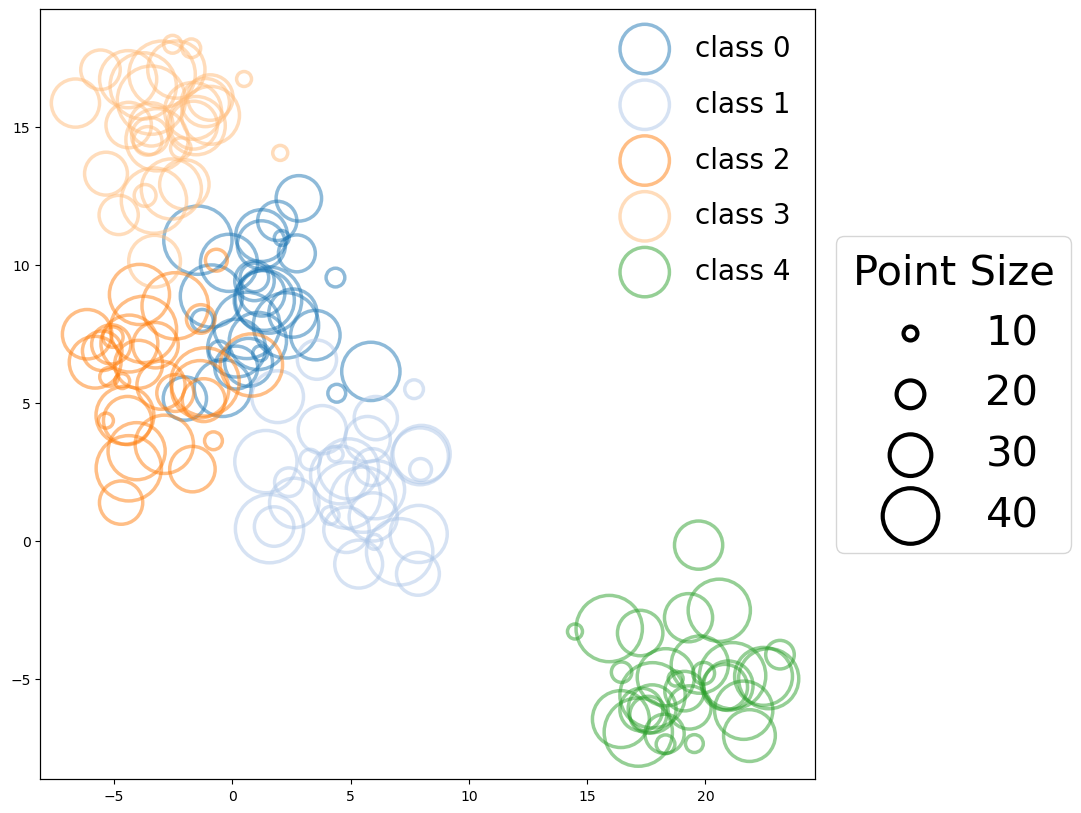

In [18]:
np.random.seed(0)

n_class, n_data = 5, 30
center_pt = np.random.uniform(-20, 20, (n_class, 2))
cmap = plt.get_cmap('tab20')
arr_color = [cmap(i) for i in range(n_class)]
arr_size = np.random.uniform(10, 50, (n_data, ))


data_dict = {'class' + str(i): None for i in range(n_class)}
for class_idx in range(n_class):
    center = center_pt[class_idx]
    x_data = center[0] + 2*np.random.normal(0, 1, (1, n_data))
    y_data = center[1] + 2*np.random.normal(0, 1, (1, n_data))
    data = np.vstack([x_data, y_data])
    
    data_dict['class' + str(class_idx)] = data
    
fig, ax = plt.subplots(figsize=(10, 10))

for class_idx in range(n_class):
    data = data_dict['class' + str(class_idx)]
    ax.scatter(data[0], data[1],
               s=arr_size**2,
               facecolor='None',
               edgecolor=arr_color[class_idx],
               linewidth=2.5,
               alpha=.5,
               label='class ' + str(class_idx))

ax.legend(loc='upper right',
          fontsize=20,
          edgecolor='None',
          facecolor='None',
          labelspacing=1)

ax2 = ax.twinx()
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

legend_sizes = [10, 20, 30, 40]
for idx, size_l in enumerate(legend_sizes):
    ax2.scatter([], [],
                facecolor='None',
                edgecolor='black',
                linewidth=3,
                s=size_l**2,
                label=str(size_l))
ax2.legend(loc='center left',
           bbox_to_anchor=(1, .5),
           fontsize=30,
           title='Point Size',
           title_fontsize=30,
           labelspacing=.5)

## 5) 연습문제

### Q1

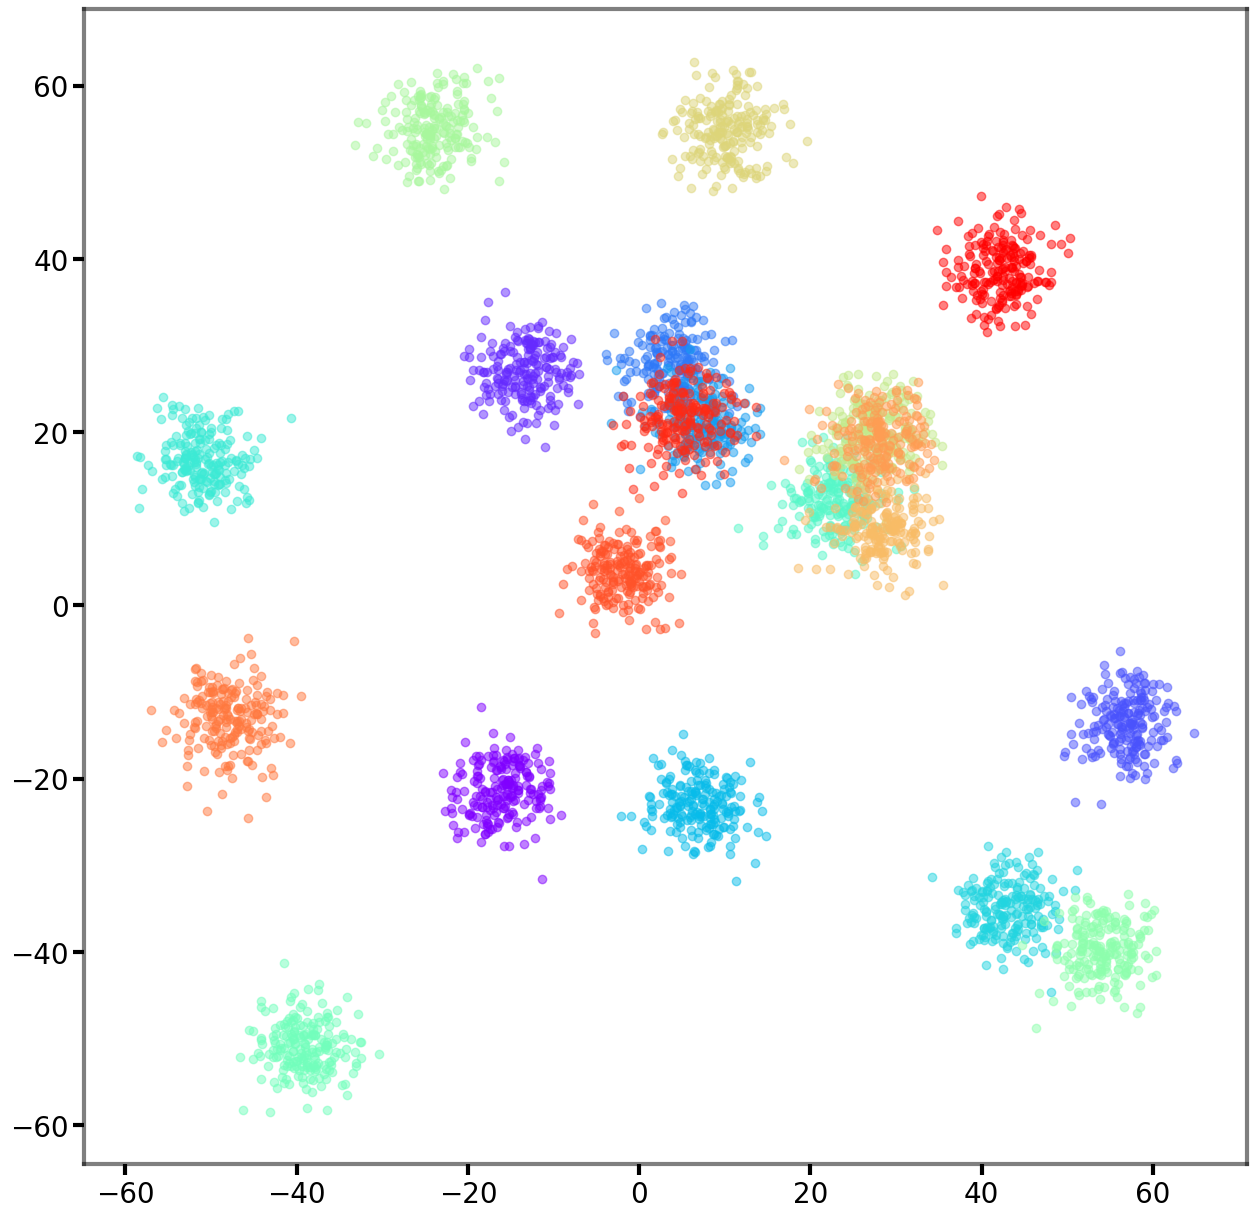

In [19]:
np.random.seed(0)

n_data = 20
n_point = 200
scale = 3
x_mean_list = np.random.randint(-60, 60, n_data)
y_mean_list = np.random.randint(-60, 60, n_data)

cmap = plt.get_cmap('rainbow', lut=n_data)

fig, ax = plt.subplots(figsize=(15, 15))

for data_idx in range(n_data):
    # data 생성
    x_data = np.random.normal(loc=x_mean_list[data_idx],
                              scale=scale,
                              size=(n_point, ))
    y_data = np.random.normal(loc=y_mean_list[data_idx],
                              scale=scale,
                              size=(n_point, ))
    # plotting
    ax.scatter(x_data, y_data,
               color=cmap(data_idx),
               alpha=.5)
    
# tick, ticklabel
x_ticks = np.arange(-60, 61, 20)
y_ticks = np.arange(-60, 61, 20)

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.tick_params(labelsize=20, length=8, width=3)

# spine
for spine_loc, spine in ax.spines.items():
    spine.set_linewidth(3)
    spine.set_alpha(.5)

### Q2

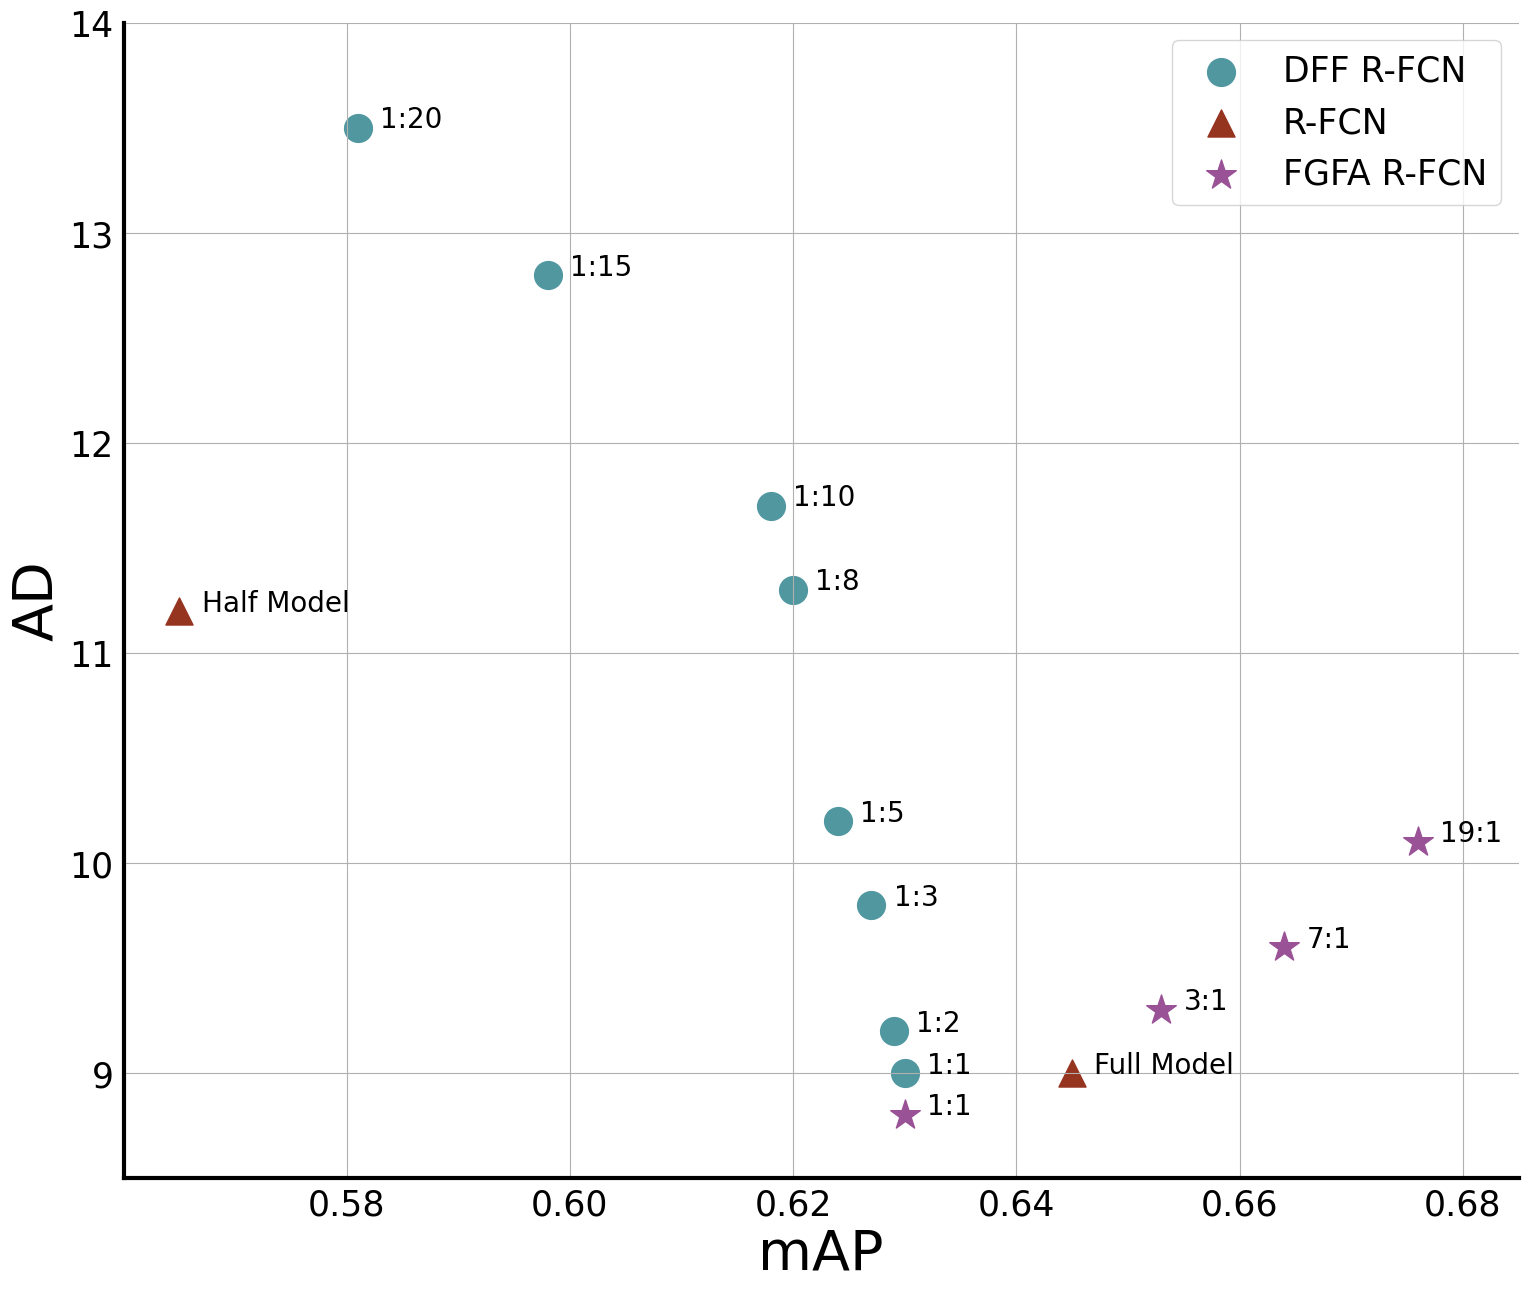

In [37]:
# data
label_list = ['DFF R-FCN', 'R-FCN', 'FGFA R-FCN']
dff_data = np.array([(.581, 13.5), (.598, 12.8), (.618, 11.7),
                     (.62, 11.3), (.624, 10.2), (.627, 9.8),
                     (.629, 9.2), (.63, 9)])
r_data = np.array([(.565, 11.2), (.645, 9)])
fgfa_data = np.array([(.63, 8.8), (.653, 9.3), (.664, 9.6),
                      (.676, 10.1)])
dff_text = ['1:20', '1:15', '1:10', '1:8',
            '1:5', '1:3', '1:2', '1:1']
r_text = ['Half Model', 'Full Model']
fgfa_text = ['1:1', '3:1', '7:1', '19:1']

colors = ['#5097A0', '#95341F', '#9A5296']
markers = ['o', '^', '*']
markersizes = [400, 380, 500]
data_vars = ['dff', 'r', 'fgfa']

# plotting
fig, ax = plt.subplots(figsize=(18, 15))
for data_idx in range(len(label_list)):
    data_template = 'data = ' + data_vars[data_idx] + '_data'
    text_template = 'text = ' + data_vars[data_idx] + '_text'
    exec(data_template)
    exec(text_template)
    
    ax.scatter(data[:, 0], data[:, 1],
               s=markersizes[data_idx],
               c=colors[data_idx],
               label=label_list[data_idx],
               marker=markers[data_idx])
    
    # annotation
    for text_idx, text in enumerate(text):
        ax.text(data[text_idx, 0] + .002, data[text_idx, 1],
                text,
                fontsize=20)
# legend
ax.legend(loc='upper right',
          fontsize=25)

# spines
for spine_loc, spine in ax.spines.items():
    if spine_loc in ['right', 'top']:
        spine.set_visible(False)
    if spine_loc in ['left', 'bottom']:
        spine.set_linewidth(3)

# label
ax.set_xlabel('mAP', fontsize= 40)
ax.set_ylabel('AD', fontsize= 40)

ax.set_xlim([.56, .685])
ax.set_ylim([8.5, 14])

# tick, ticklabels
xticks = np.arange(.58, .69, .02)
yticks = np.arange(9, 15, 1)

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(labelsize=25,
               left=False, bottom=False)

ax.grid()